# Nguyen Van Minh - 22003405 - Midterm

In [ ]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()

Saving IT-salaries-in-EU-2018.csv to IT-salaries-in-EU-2018 (2).csv


In [ ]:
# 1. Đọc dữ liệu và hiển thị 5 dòng dữ liệu đầu tiên.
df = pd.read_csv('IT-salaries-in-EU-2018.csv')
df.head(5)

,Timestamp,Age,Gender,City,Position,Years of experience,Your level,Current Salary,Salary one year ago,Salary two years ago,Are you getting any Stock Options?,Main language at work,Company size,Company type
0,14/12/2018 12:41:33,43.0,M,München,QA Ingenieur,11.0,Senior,77000.0,76200.0,68000.0,No,Deutsch,100-1000,Product
1,14/12/2018 12:42:09,33.0,F,München,Senior PHP Magento developer,8.0,Senior,65000.0,55000.0,55000.0,No,Deutsch,50-100,Product
2,14/12/2018 12:47:36,32.0,M,München,Software Engineer,10.0,Senior,88000.0,73000.0,54000.0,No,Deutsch,1000+,Product
3,14/12/2018 12:50:15,25.0,M,München,Senior Frontend Developer,6.0,Senior,78000.0,55000.0,45000.0,Yes,English,1000+,Product
4,14/12/2018 12:50:31,39.0,M,München,UX Designer,10.0,Senior,69000.0,60000.0,52000.0,No,English,100-1000,Ecom retailer


In [ ]:
# 2.  (3 điểm) Tìm hiểu thông tin về dữ liệu:
# a. (1đ) Dữ liệu  bao  gồm những thuộc tính nào? Liệt kê theo nhóm các thuộc
# tính định tính, các thuộc tính định lượng và chọn tham số thống kê mô tả
# phù hợp để đo độ tập trung dữ liệu của mỗi nhóm.

# Hiển thị danh sách các thuộc tính
print("Các thuộc tính của dữ liệu:")
print(df.columns.tolist())
# Phân loại thuộc tính
qualitative_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
quantitative_cols = df.select_dtypes(include=['number']).columns.tolist()
print("\nThuộc tính định tính:")
print(qualitative_cols)
print("\nThuộc tính định lượng:")
print(quantitative_cols)

# Tính mode cho thuộc tính định tính
print("\nMode của các thuộc tính định tính:")
for col in qualitative_cols:
    mode_value = df[col].mode().values[0]
    print(f"{col}: {mode_value}")
# Tính mean và median cho thuộc tính định lượng
print("\nMean và Median của các thuộc tính định lượng:")
for col in quantitative_cols:
    mean_value = df[col].mean()
    median_value = df[col].median()
    print(f"{col}: Mean = {mean_value}, Median = {median_value}")

print('*'*100)
# b.  (2đ) Có bao nhiêu loại công ty (company type) trong khảo sát? Liệt kê các
# loại công ty đó.
company_count = df['Company type'].nunique()
company_types = df['Company type'].unique()
print(f"Có {company_count} loại công ty trong khảo sát là: {company_types}")

Các thuộc tính của dữ liệu:
['Timestamp', 'Age', 'Gender', 'City', 'Position', 'Years of experience', 'Your level', 'Current Salary', 'Salary one year ago', 'Salary two years ago', 'Are you getting any Stock Options?', 'Main language at work', 'Company size', 'Company type']

Thuộc tính định tính:
['Timestamp', 'Gender', 'City', 'Position', 'Your level', 'Are you getting any Stock Options?', 'Main language at work', 'Company size', 'Company type']

Thuộc tính định lượng:
['Age', 'Years of experience', 'Current Salary', 'Salary one year ago', 'Salary two years ago']

Mode của các thuộc tính định tính:
Timestamp: 14/12/2018 12:53:47
Gender: M
City: Berlin
Position: Java Developer
Your level: Senior
Are you getting any Stock Options?: No
Main language at work: English
Company size: 100-1000
Company type: Product

Mean và Median của các thuộc tính định lượng:
Age: Mean = 32.183035714285715, Median = 32.0
Years of experience: Mean = 8.548497267759563, Median = 8.0
Current Salary: Mean = 683

Tỷ lệ nam xuất hiện trong khảo sát là: 86.02%
Tỷ lệ nữ xuất hiện trong khảo sát là: 13.98%


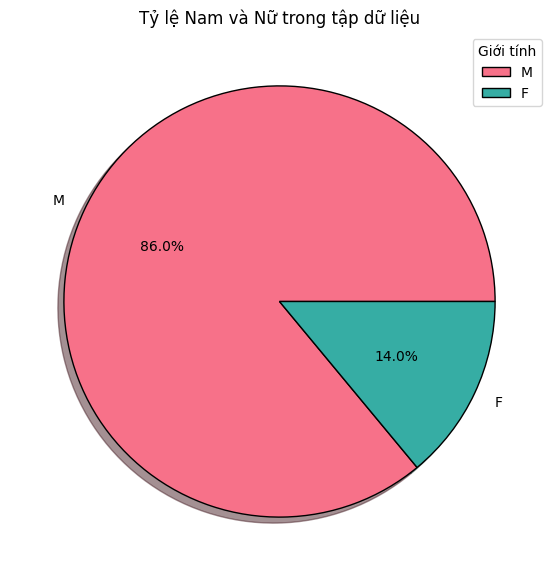

In [ ]:
# 3.  (3 đ) Cho biết tỷ lệ nam và nữ xuất hiện trong khảo sát? Chọn loại đồ thị phù hợp
# trực quan để làm nổi bật so sánh của 2 tỷ lệ này.
male_ratio, female_ratio = df['Gender'].value_counts(normalize=True) * 100
print(f"Tỷ lệ nam xuất hiện trong khảo sát là: {male_ratio:.2f}%")
print(f"Tỷ lệ nữ xuất hiện trong khảo sát là: {female_ratio:.2f}%")

gender_ratio = df['Gender'].value_counts(normalize=True)
colors = sns.color_palette("husl", len(gender_ratio))
explode = [0.05, 0]
plt.figure(figsize=(7, 7))
plt.pie(
    x = gender_ratio,
    labels=gender_ratio.index,
    autopct='%1.1f%%',
    colors=colors,
    shadow=True,
    # explode=explode,
    wedgeprops={'edgecolor': 'black'}
)
plt.title("Tỷ lệ Nam và Nữ trong tập dữ liệu")
plt.legend(title="Giới tính", loc="upper right")
plt.show()

****************************************************************************************************
Nam: Trung bình: 70144.54432348367 | Trung vị: 68000.0 | Độ lệch chuẩn: 21236.96522177726 | IQR: 17000.0
Nữ: Trung bình: 57272.903846153844 | Trung vị: 55400.0 | Độ lệch chuẩn: 17474.38068323193 | IQR: 17712.5
****************************************************************************************************


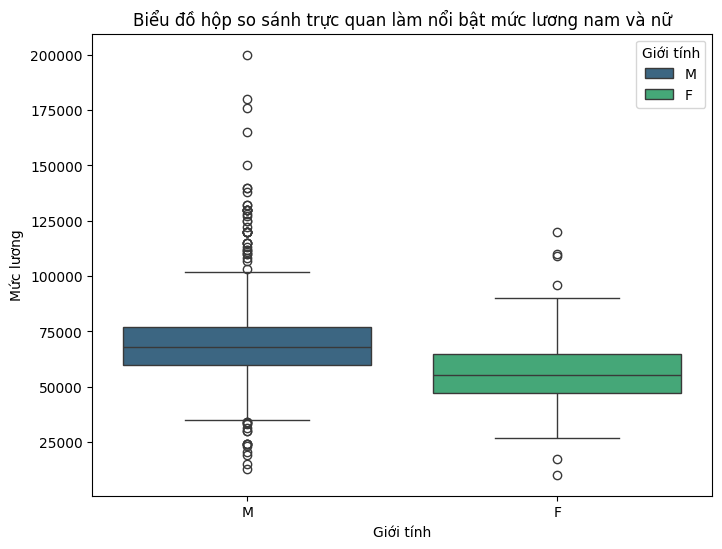

' '

In [ ]:
# 4.  (2.0 đ) Để so sánh mức lương của nam và nữ trong ngành IT:

# a. Tính đại lượng đặc trưng cho độ tập trung và độ phân tán về mức lương của
# nam và nữ. Bình luận kết quả tính được.
male_salaries = df[df['Gender'] =='M']['Current Salary'].dropna()
female_salaries = df[df['Gender'] =='F']['Current Salary'].dropna()
# Tính đại lượng đặc trưng cho độ tập trung
male_mean = male_salaries.mean()
male_median = male_salaries.median()
female_mean = female_salaries.mean()
female_median = female_salaries.median()
# Tính đại lượng đặc trưng cho độ phân tán
male_std = male_salaries.std()
female_std = female_salaries.std()
male_iqr = male_salaries.quantile(0.75) - male_salaries.quantile(0.25)
female_iqr = female_salaries.quantile(0.75) - female_salaries.quantile(0.25)
print('*'*100)
print(f'Nam: Trung bình: {male_mean} | Trung vị: {male_median} | Độ lệch chuẩn: {male_std} | IQR: {male_iqr}')
print(f'Nữ: Trung bình: {female_mean} | Trung vị: {female_median} | Độ lệch chuẩn: {female_std} | IQR: {female_iqr}')
print('*'*100)

'''
  Trung bình (mean): (Nam: 70,144.54, Nữ: 57,272.90)
      Bình luận: Mức lương trung bình của nam cao hơn nữ khoảng 12,871.64 (70,144.54 - 57,272.90).
      Điều này cho thấy, trung bình, nam giới trong ngành IT có thu nhập cao hơn nữ giới một cách đáng kể.

  Trung vị (median): (Nam: 68,000.0, Nữ: 55,400.0)
      Bình luận: Trung vị của nam cũng cao hơn nữ, với chênh lệch là 12,600.
      Vì trung vị không bị ảnh hưởng nhiều bởi các giá trị ngoại lai, sự khác biệt này phản ánh
      một xu hướng chung rằng mức lương của nam thường cao hơn nữ trong ngành IT.

  Độ lệch chuẩn (standard deviation): (Nam: 21,236.97, Nữ: 17,474.38)
      Bình luận: Độ lệch chuẩn của nam cao hơn nữ, cho thấy mức lương của nam có sự biến động lớn hơn.
      Điều này có thể ngụ ý rằng trong nhóm nam, có sự phân bố lương rộng hơn, với một số cá nhân có mức lương rất cao hoặc rất thấp.

  Khoảng cách giữa các phân vị (IQR): (Nam: 17,000.0, Nữ: 17,712.5)
      Bình luận: IQR của nữ cao hơn một chút so với nam (17,712.5 so với 17,000),
      cho thấy sự phân tán của 50% dữ liệu lương ở giữa của nữ lớn hơn nam. Nói cách khác,
      trong khoảng lương trung bình, nữ có sự chênh lệch lớn hơn một chút so với nam.
 '''

# b.  Hãy chọn đồ thị phù hợp để trực quan làm nổi bật sự so sánh mức lương nam
# và nữ. Đưa ra bình luận của anh/chị. Kết quả  này có tương đồng với bình
# luận của anh/chị ở trên không?
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='Gender',
    y='Current Salary',
    data=df,
    hue="Gender",
    palette="viridis"
)
plt.title('Biểu đồ hộp so sánh trực quan làm nổi bật mức lương nam và nữ')
plt.xlabel("Giới tính")
plt.ylabel("Mức lương")
plt.legend(title="Giới tính", bbox_to_anchor=(1, 1), loc='upper right')
plt.show()

'''
Biểu đồ hộp so sánh mức lương giữa nam (M) và nữ (F) cho thấy:
    - Trung vị: Nam (~70,000) cao hơn nữ (~55,000), chênh lệch ~12,600,
    cho thấy lương điển hình của nam vượt trội hơn.

    - IQR: Biểu đồ hiển thị IQR của nam và nữ tương đương (~50,000),
    nhưng giá trị thực (17,000 cho nam, 17,712.5 cho nữ) cho thấy nữ có độ phân tán lớn hơn một chút.

    - Râu và ngoại lai: Nam có râu dài hơn, nhiều ngoại lai cao (150,000-200,000),
    phản ánh biến động lớn hơn, trong khi nữ ít ngoại lai hơn (cao nhất ~125,000).

Kết quả từ biểu đồ tương đối tương đồng với câu a:
    - Độ tập trung: Trung vị trên biểu đồ xác nhận nam cao hơn nữ, khớp với chênh lệch 12,600.
    - Độ phân tán: Biến động lớn hơn ở nam (râu, ngoại lai) phù hợp với độ lệch chuẩn cao hơn (21,236.97 so với 17,474.38).
      Tuy nhiên, IQR trên biểu đồ (~50,000) không khớp với giá trị tính toán (17,000-17,712.5), có thể do sai sót thang đo.
    - Tổng thể: Biểu đồ củng cố nhận định về sự bất bình đẳng giới, với nam có lương cao hơn và biến động lớn hơn.
'''
''' '''


5. Các yếu tố ảnh hưởng đến mức lương:
Ma trận tương quan:
                          Age  Years of experience  Current Salary
Age                  1.000000             0.652697        0.183753
Years of experience  0.652697             1.000000        0.339587
Current Salary       0.183753             0.339587        1.000000


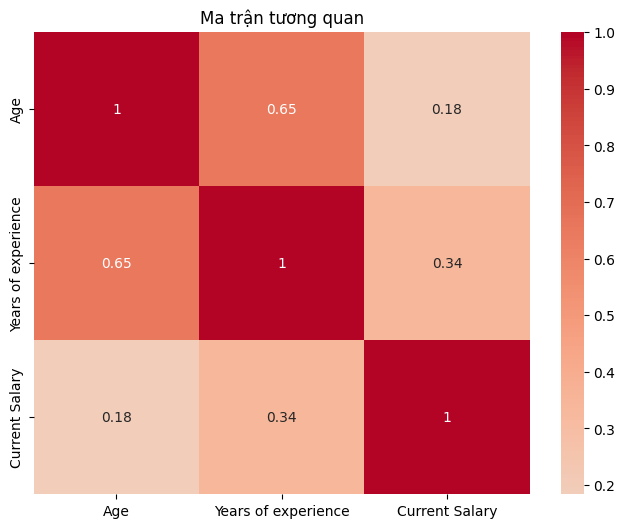


Mức lương trung bình theo cấp độ (Your level):
Your level
Junior    52300.000000
Middle    58034.705882
Senior    77149.816850
Name: Current Salary, dtype: float64

Mức lương trung bình theo loại công ty:
Company type
Agency                    72544.827586
Automotive               103500.000000
Big Tech                 132250.000000
Blockchain technology     83000.000000
Consult                   42000.000000
Consultancy               72000.000000
Consulting                63750.000000
Consulting (banking)      50000.000000
Corporation               80000.000000
E-Commerce                63000.000000
E-Commerce firm           46000.000000
Ecom retailer             69000.000000
Ecommerce                100000.000000
GmbH                     100000.000000
ISP                       33600.000000
IT Consultancy            65000.000000
IT Consulting             65000.000000
IT Dienstleistungen       68000.000000
IT Service Provider       72000.000000
IT-Beratung               64500.000000
I

'  '

In [97]:
# 5.  (1 điểm) Những yếu tố (thuộc tính) nào ảnh hưởng đến mức lương của nhân lực
# IT? Dùng bằng chứng thống kê để giải thích cho nhận định đó của anh/chị.

print("\n5. Các yếu tố ảnh hưởng đến mức lương:")
# Tương quan giữa các biến số và mức lương
numeric_cols = ['Age', 'Years of experience', 'Current Salary']
correlation = df[numeric_cols].corr()
print("Ma trận tương quan:")
print(correlation)

# Trực quan hóa tương quan
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Ma trận tương quan')
plt.show()

# Phân tích theo các yếu tố định tính
print("\nMức lương trung bình theo cấp độ (Your level):")
print(df.groupby('Your level')['Current Salary'].mean())

print("\nMức lương trung bình theo loại công ty:")
print(df.groupby('Company type')['Current Salary'].mean())

'''
  Các yếu tố ảnh hưởng chính đến mức lương bao gồm: Years of experience (kinh nghiệm),
  Your level (cấp độ), và Company type (loại công ty). Những yếu tố này đều có tác động
  rõ rệt đến mức lương dựa trên các số liệu thống kê.
'''
'''  '''